In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import datetime

from statsmodels.formula.api import ols

sns.set_theme(style="darkgrid")
plt.style.use('bmh')
%matplotlib inline

In [3]:
#Dados de São Paulo extraídos do Infosigasp em:
#http://painelderesultados.infosiga.sp.gov.br/dados.web/ViewPage.do?name=obitos_publico&contextId=8a80809939587c0901395881fc2b0004

df_mobility = pd.read_csv('../dataframes/mobility-rep.csv.gz')
df_mobility['date'] = pd.to_datetime(df_mobility['date'])

/mnt/c/Users/erick/Documents/Trabalhos e estudos/pythonenv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df_acidentesMes = pd.read_csv('../data/acidentes_fatais_mes_a_mes.csv', sep = ';', encoding = 'iso-8859-1')

df_acidentesMes = df_acidentesMes.drop('Unnamed: 0', axis=1)
df_acidentesMes = df_acidentesMes.rename(index = {0 : 'Janeiro', 1:'Fevereiro', 2:'Março', 3:'Abril', 4:'Maio', 5:'Junho', 6:'Julho', 7:'Agosto', 8:'Setembro', 9:'Outubro', 10:'Novembro', 11:'Dezembro'})
df_acidentesMes = df_acidentesMes.drop(['Novembro', 'Dezembro'], axis=0)
df_acidentesMes

2015  2016  2017  2018  2019   2020
Janeiro     523   405   395   360   384  367.0
Fevereiro   451   411   389   355   333  353.0
Março       545   496   439   434   404  419.0
Abril       511   518   432   448   387  299.0
Maio        560   482   489   415   460  369.0
Junho       521   435   462   467   460  314.0
Julho       484   499   509   456   427  374.0
Agosto      527   475   420   436   462  419.0
Setembro    441   441   457   450   425  433.0
Outubro     509   472   437   416   440  393.0

<AxesSubplot:title={'center':'Número de acidentes fatais por mês no estado de São Paulo'}>

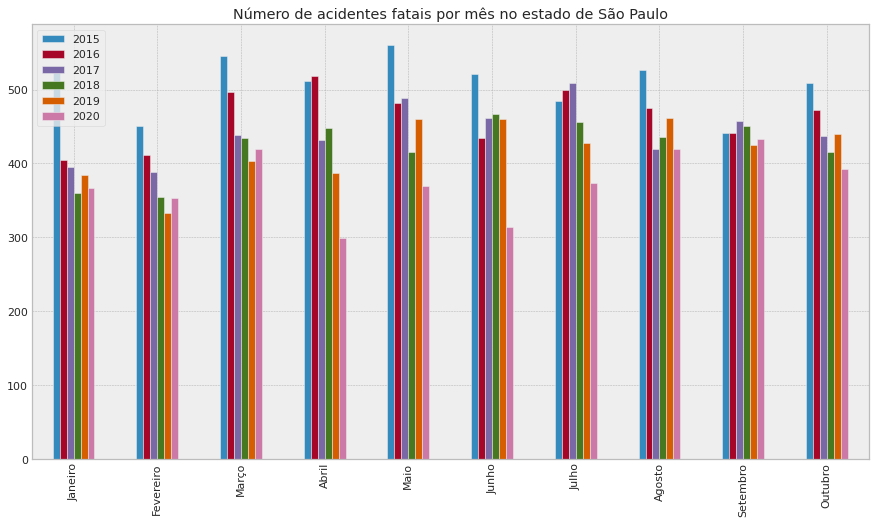

In [5]:
df_acidentesMes.plot.bar(figsize=(15,8), title = 'Número de acidentes fatais por mês no estado de São Paulo')

In [6]:
#Dados de acidentes Policia Rodoviária Federal
#http://arquivos.prf.gov.br/arquivos/index.php/s/jdDLrQIf33xXSCe/download

df_fed = pd.read_csv('../data/datatran2020.csv', sep = ';', encoding = 'iso-8859-1')
df_fed['data_inversa'] = pd.to_datetime(df_fed['data_inversa'])
df_fed = df_fed.rename(columns={'data_inversa' : 'data'})
df_fed

id       data    dia_semana   horario  uf     br     km  \
0      260031.0 2020-01-01  quarta-feira  01:00:00  TO  153.0  678,1   
1      260036.0 2020-01-01  quarta-feira  01:00:00  RJ  116.0    178   
2      260037.0 2020-01-01  quarta-feira  01:52:00  SC  101.0  206,9   
3      260038.0 2020-01-01  quarta-feira  01:15:00  RO  364.0    236   
4      260039.0 2020-01-01  quarta-feira  01:30:00  PR  153.0    360   
...         ...        ...           ...       ...  ..    ...    ...   
51515  322804.0 2020-10-31        sábado  14:35:00  PA  230.0    232   
51516  322840.0 2020-10-13   terça-feira  05:50:00  BA  330.0  797,8   
51517  322848.0 2020-10-03        sábado  11:30:00  TO  153.0    621   
51518  323081.0 2020-08-14   sexta-feira  10:45:00  RJ  101.0    179   
51519  323135.0 2020-06-21       domingo  10:30:00  PI  343.0    256   

                  municipio  \
0                    GURUPI   
1               NOVA IGUACU   
2                  SAO JOSE   
3                    CACOAL   
4                  REBOUCAS   
...                     ...   
51515     NOVO REPARTIMENTO   
51516                JEQUIE   
51517  ALIANCA DO TOCANTINS   
51518        RIO DAS OSTRAS   
51519           CAMPO MAIOR   

                                          causa_acidente  \
0                                       Animais na Pista   
1                           Falta de Atenção do Pedestre   
2                                     Ingestão de Álcool   
3                                Velocidade Incompatível   
4                                     Ingestão de Álcool   
...                                                  ...   
51515  Desobediência às normas de trânsito pelo condutor   
51516                        Falta de Atenção à Condução   
51517                        Falta de Atenção à Condução   
51518                                  Condutor Dormindo   
51519                                     Defeito na Via   

                      tipo_acidente  ... feridos_graves ilesos ignorados  \
0           Atropelamento de Animal  ...              5      0         0   
1         Atropelamento de Pedestre  ...              0      1         0   
2                   Colisão lateral  ...              0      1         0   
3         Saída de leito carroçável  ...              1      0         0   
4                       Capotamento  ...              4      0         0   
...                             ...  ...            ...    ...       ...   
51515               Colisão lateral  ...              0      2         0   
51516               Colisão frontal  ...              2      1         0   
51517           Colisão transversal  ...              0      1         0   
51518               Colisão frontal  ...              0      3         0   
51519  Queda de ocupante de veículo  ...              1      0         0   

      feridos veiculos      latitude     longitude  regional  delegacia  \
0           5        1  -11,77460203  -49,10744996     SR-TO   UOP01/TO   
1           0        1  -22,75223028   -43,4379103     SR-RJ     DEL5/1   
2           1        2  -27,59193546  -48,61824557     SR-SC     DEL8/1   
3           1        1  -11,44624577  -61,43761218     SR-RO    DEL21/2   
4           6        1  -25,67503796  -50,75089805     SR-PR     DEL7/3   
...       ...      ...           ...           ...       ...        ...   
51515       1        2   -4,74157922  -49,63689319     SR-PA      UOP01   
51516       2        2   -13,9254033  -40,00293732     SR-BA      UOP01   
51517       1        2  -11,28283904  -48,93834856     SR-TO      UOP02   
51518       3        5  -22,40006602  -41,99621581     SR-RJ      UOP04   
51519       2        1     -4,777813    -42,115211     SR-PI      UOP03   

            uop  
0           NaN  
1      UOP02/RJ  
2      UOP01/SC  
3      UOP02/RO  
4      UOP04/PR  
...         ...  
51515     DEL03  
51516     DEL03  
51517     DEL01  
51518     DEL08  
51519     DEL01  

[51520 rows x 30 column

In [7]:
df_fed['data_lockdown'] = '2020-03-24'
df_fed['data'] = pd.to_datetime(df_fed['data'])
df_fed['data_lockdown'] = pd.to_datetime(df_fed['data_lockdown'])

In [8]:
def diasQuarentena(row):
    return row['data'] - row['data_lockdown']

def posQuarentena(row):
    if row['data'] > row['data_lockdown']:
        return 1
    else:
        return 0

In [9]:
df_fed['dias_de_quarentena'] = df_fed.apply(lambda row: diasQuarentena(row) , axis=1)
df_fed['pos_quarentena'] = df_fed.apply(lambda row: posQuarentena(row) , axis=1)
df_fed['dias_de_quarentena'] = df_fed['dias_de_quarentena']/np.timedelta64(1, 'D')
df_fed.sort_values(by='dias_de_quarentena', axis = 0)
df_fed

id       data    dia_semana   horario  uf     br     km  \
0      260031.0 2020-01-01  quarta-feira  01:00:00  TO  153.0  678,1   
1      260036.0 2020-01-01  quarta-feira  01:00:00  RJ  116.0    178   
2      260037.0 2020-01-01  quarta-feira  01:52:00  SC  101.0  206,9   
3      260038.0 2020-01-01  quarta-feira  01:15:00  RO  364.0    236   
4      260039.0 2020-01-01  quarta-feira  01:30:00  PR  153.0    360   
...         ...        ...           ...       ...  ..    ...    ...   
51515  322804.0 2020-10-31        sábado  14:35:00  PA  230.0    232   
51516  322840.0 2020-10-13   terça-feira  05:50:00  BA  330.0  797,8   
51517  322848.0 2020-10-03        sábado  11:30:00  TO  153.0    621   
51518  323081.0 2020-08-14   sexta-feira  10:45:00  RJ  101.0    179   
51519  323135.0 2020-06-21       domingo  10:30:00  PI  343.0    256   

                  municipio  \
0                    GURUPI   
1               NOVA IGUACU   
2                  SAO JOSE   
3                    CACOAL   
4                  REBOUCAS   
...                     ...   
51515     NOVO REPARTIMENTO   
51516                JEQUIE   
51517  ALIANCA DO TOCANTINS   
51518        RIO DAS OSTRAS   
51519           CAMPO MAIOR   

                                          causa_acidente  \
0                                       Animais na Pista   
1                           Falta de Atenção do Pedestre   
2                                     Ingestão de Álcool   
3                                Velocidade Incompatível   
4                                     Ingestão de Álcool   
...                                                  ...   
51515  Desobediência às normas de trânsito pelo condutor   
51516                        Falta de Atenção à Condução   
51517                        Falta de Atenção à Condução   
51518                                  Condutor Dormindo   
51519                                     Defeito na Via   

                      tipo_acidente  ... feridos veiculos      latitude  \
0           Atropelamento de Animal  ...       5        1  -11,77460203   
1         Atropelamento de Pedestre  ...       0        1  -22,75223028   
2                   Colisão lateral  ...       1        2  -27,59193546   
3         Saída de leito carroçável  ...       1        1  -11,44624577   
4                       Capotamento  ...       6        1  -25,67503796   
...                             ...  ...     ...      ...           ...   
51515               Colisão lateral  ...       1        2   -4,74157922   
51516               Colisão frontal  ...       2        2   -13,9254033   
51517           Colisão transversal  ...       1        2  -11,28283904   
51518               Colisão frontal  ...       3        5  -22,40006602   
51519  Queda de ocupante de veículo  ...       2        1     -4,777813   

          longitude regional delegacia       uop  data_lockdown  \
0      -49,10744996    SR-TO  UOP01/TO       NaN     2020-03-24   
1       -43,4379103    SR-RJ    DEL5/1  UOP02/RJ     2020-03-24   
2      -48,61824557    SR-SC    DEL8/1  UOP01/SC     2020-03-24   
3      -61,43761218    SR-RO   DEL21/2  UOP02/RO     2020-03-24   
4      -50,75089805    SR-PR    DEL7/3  UOP04/PR     2020-03-24   
...             ...      ...       ...       ...            ...   
51515  -49,63689319    SR-PA     UOP01     DEL03     2020-03-24   
51516  -40,00293732    SR-BA     UOP01     DEL03     2020-03-24   
51517  -48,93834856    SR-TO     UOP02     DEL01     2020-03-24   
51518  -41,99621581    SR-RJ     UOP04     DEL08     2020-03-24   
51519    -42,115211    SR-PI     UOP03     DEL01     2020-03-24   

       dias_de_quarentena  pos_quarentena  
0                   -83.0               0  
1                   -83.0               0  
2                   -83.0               0  
3                   -83.0               0  
4                   -83.0               0  
...                   ...             ...  
51515               221.0               

In [10]:
df_fed['num_acidentes'] = df_fed.groupby('data')['data'].transform('count')
df_fed.drop_duplicates(subset=['data'])
#df_fed.set_index('data').join(df_mobility.set_index('date'))
df_fed.head()

id       data    dia_semana   horario  uf     br     km    municipio  \
0  260031.0 2020-01-01  quarta-feira  01:00:00  TO  153.0  678,1       GURUPI   
1  260036.0 2020-01-01  quarta-feira  01:00:00  RJ  116.0    178  NOVA IGUACU   
2  260037.0 2020-01-01  quarta-feira  01:52:00  SC  101.0  206,9     SAO JOSE   
3  260038.0 2020-01-01  quarta-feira  01:15:00  RO  364.0    236       CACOAL   
4  260039.0 2020-01-01  quarta-feira  01:30:00  PR  153.0    360     REBOUCAS   

                 causa_acidente              tipo_acidente  ... veiculos  \
0              Animais na Pista    Atropelamento de Animal  ...        1   
1  Falta de Atenção do Pedestre  Atropelamento de Pedestre  ...        1   
2            Ingestão de Álcool            Colisão lateral  ...        2   
3       Velocidade Incompatível  Saída de leito carroçável  ...        1   
4            Ingestão de Álcool                Capotamento  ...        1   

       latitude     longitude regional delegacia       uop data_lockdown  \
0  -11,77460203  -49,10744996    SR-TO  UOP01/TO       NaN    2020-03-24   
1  -22,75223028   -43,4379103    SR-RJ    DEL5/1  UOP02/RJ    2020-03-24   
2  -27,59193546  -48,61824557    SR-SC    DEL8/1  UOP01/SC    2020-03-24   
3  -11,44624577  -61,43761218    SR-RO   DEL21/2  UOP02/RO    2020-03-24   
4  -25,67503796  -50,75089805    SR-PR    DEL7/3  UOP04/PR    2020-03-24   

   dias_de_quarentena  pos_quarentena  num_acidentes  
0               -83.0               0            215  
1               -83.0               0            215  
2               -83.0               0            215  
3               -83.0               0            215  
4               -83.0               0            215  

[5 rows x 34 columns]

<AxesSubplot:xlabel='dias_de_quarentena', ylabel='num_acidentes'>

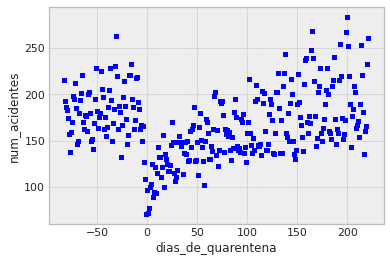

In [11]:
df_fed.plot.scatter(x = 'dias_de_quarentena', y = 'num_acidentes')

In [12]:
model = ols("num_acidentes ~ dias_de_quarentena + pos_quarentena + dias_de_quarentena*pos_quarentena ", data=df_fed)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          num_acidentes   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     8109.
Date:                Tue, 15 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:50:02   Log-Likelihood:            -2.4963e+05
No. Observations:               51520   AIC:                         4.993e+05
Df Residuals:                   51516   BIC:                         4.993e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           183.5391      0.511    358.939      0.000     182.537     184.541
dias_de_quarentena                   -0.0378      0.011     -3.572      0.000      -0.059      -0.017
pos_quarentena                      -56.9237      0.620    -91.798      0.000     -58.139     -55.708
dias_de_quarentena:pos_quarentena     0.4293      0.011     39.367      0.000       0.408       0.451
==============================================================================
Omnibus:                      274.938   Durbin-Watson:                   0.268
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.967
Skew:                           0.123   Prob(JB):                     1.05e-53
Kurtosis:                       2.770   Cond. No.                         920.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='dias_de_quarentena', ylabel='num_acidentes'>

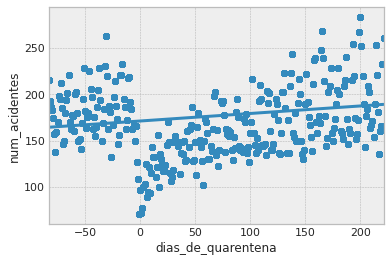

In [17]:
sns.regplot(x='dias_de_quarentena', y='num_acidentes', data=df_fed)

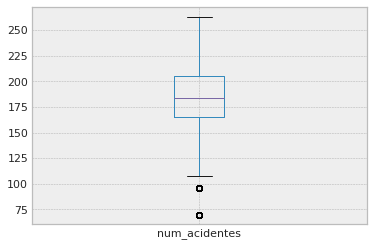

In [18]:
df_fedpre = df_fed[df_fed['pos_quarentena'] == 0]
boxplot = df_fedpre.boxplot(column=['num_acidentes'])

<AxesSubplot:xlabel='dias_de_quarentena', ylabel='num_acidentes'>

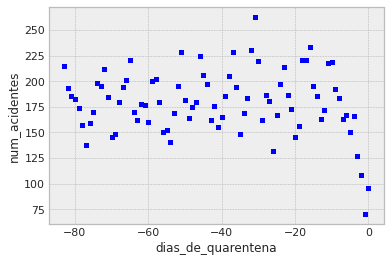

In [19]:
df_fedpre.plot.scatter(x = 'dias_de_quarentena', y = 'num_acidentes')

<AxesSubplot:xlabel='dias_de_quarentena', ylabel='num_acidentes'>

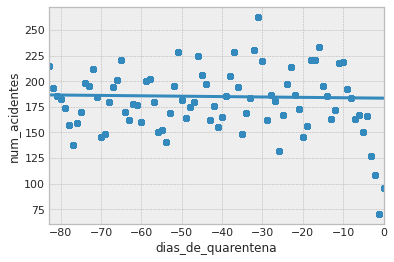

In [20]:
sns.regplot(x='dias_de_quarentena', y='num_acidentes', data=df_fedpre)

In [21]:
model = ols("num_acidentes ~ dias_de_quarentena", data=df_fedpre)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          num_acidentes   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     13.77
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           0.000207
Time:                        16:52:07   Log-Likelihood:                -72546.
No. Observations:               15091   AIC:                         1.451e+05
Df Residuals:                   15089   BIC:                         1.451e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            183.5391      0.492    372.872      0.000     182.574     184.504
dias_de_quarentena    -0.0378      0.010     -3.711      0.000      -0.058      -0.018
==============================================================================
Omnibus:                      281.551   Durbin-Watson:                   0.243
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              482.771
Skew:                          -0.158   Prob(JB):                    1.47e-105
Kurtosis:                       3.818   Cond. No.                         98.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
df_fedpos = df_fed[df_fed['pos_quarentena'] == 1]

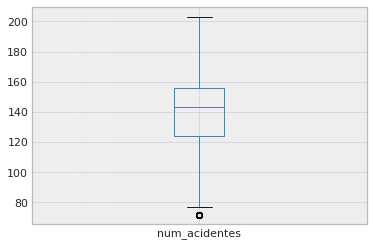

In [23]:
df_fedpos2 = df_fed[df_fed['pos_quarentena'] == 1]
df_fedpos2 = df_fedpos2[df_fedpos2['data'] < '2020-06-01']
boxplot = df_fedpos2.boxplot(column=['num_acidentes'])

<AxesSubplot:xlabel='dias_de_quarentena', ylabel='num_acidentes'>

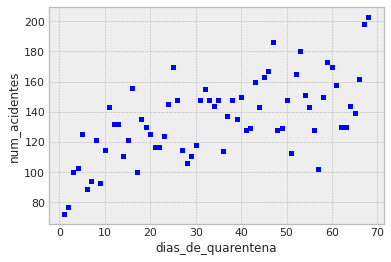

In [24]:
df_fedpos2.plot.scatter(x = 'dias_de_quarentena', y = 'num_acidentes')

<AxesSubplot:xlabel='dias_de_quarentena', ylabel='num_acidentes'>

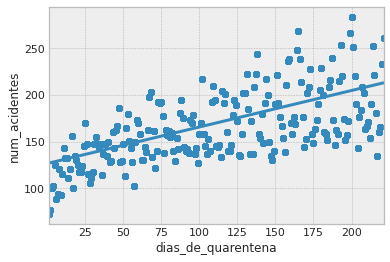

In [25]:
sns.regplot(x='dias_de_quarentena', y='num_acidentes', data=df_fedpos)

In [26]:
model = ols("num_acidentes ~ dias_de_quarentena", data=df_fedpos2)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          num_acidentes   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     6007.
Date:                Tue, 15 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:52:12   Log-Likelihood:                -40776.
No. Observations:                9192   AIC:                         8.156e+04
Df Residuals:                    9190   BIC:                         8.157e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            108.6471      0.462    235.349      0.000     107.742     109.552
dias_de_quarentena     0.8586      0.011     77.503      0.000       0.837       0.880
==============================================================================
Omnibus:                      167.150   Durbin-Watson:                   0.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.724
Skew:                          -0.095   Prob(JB):                     1.34e-22
Kurtosis:                       2.524   Cond. No.                         90.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# To-do

## -Fazer um Scatter Plot + Regressão Linear para: cada tipo de acidente / número de acidentes de manhã / número de acidentes de noite/ dia da semana / hora do rush

## -Fazer uma regressão linear múltipla seguindo o exemplo do GLO-DP-0616.pdf 

### Possíveis candidatos a variáveis independentes: 
### -coeficiente de interesse: aumento no número de acidentes por aumento percentual da mobilidade
### -número de dias pós lockdown (sendo 0 se for pré e 1 se for pós)
### -Considerar o dia da semana

## -Exibir em uma tabela através da regressão o quanto o covid tem de impacto no número de acidentes

# Limitações: conseguir o número de casos para cada tipo de acidente em cada data.